In [317]:
from xml.dom import minidom
import os
import pandas as pd
# parse an xml file by name
metadatafilename = '/Users/keikhosravia2/Desktop/faisal images/200830-FSA-PLATE1-EXP081720_20200830_202053/AssayPlate_PerkinElmer_CellCarrier-384/MeasurementData.mlf'
mydoc = minidom.parse(metadatafilename)
PATH_TO_FILES = os.path.split(metadatafilename)[0]
items = mydoc.getElementsByTagName('bts:MeasurementRecord')

df_cols = ["ImageName", "Column", "Row", "TimePoint", "FieldIndex", "ZSlice", "Channel", 
                   "X_coordinates", "Y_coordinates","Z_coordinate", "ActionIndex", "Action", "Type", "Time"]
rows = []

for i in range(items.length):

    rows.append({

         "ImageName": os.path.join(PATH_TO_FILES,items[i].firstChild.data), 
         "Column": items[i].attributes['bts:Column'].value, 
         "Row": items[i].attributes['bts:Row'].value, 
         "TimePoint": items[i].attributes['bts:TimePoint'].value, 
         "FieldIndex": items[i].attributes['bts:FieldIndex'].value, 
         "ZSlice": items[i].attributes['bts:ZIndex'].value, 
         "Channel": items[i].attributes['bts:Ch'].value,
         "X_coordinates": items[i].attributes['bts:X'].value,
         "Y_coordinates": items[i].attributes['bts:Y'].value,
         "Z_coordinate": items[i].attributes['bts:Z'].value,
         "ActionIndex": items[i].attributes['bts:ActionIndex'].value,
         "Action": items[i].attributes['bts:Action'].value, 
         "Type": items[i].attributes['bts:Type'].value, 
         "Time": items[i].attributes['bts:Time'].value

                })
out_df = pd.DataFrame(rows, columns = df_cols)


                                              ImageName Column Row TimePoint  \
2327  /Users/keikhosravia2/Desktop/faisal images/200...     10   9         1   

     FieldIndex ZSlice Channel X_coordinates Y_coordinates Z_coordinate  \
2327          7      1       2        -397.5         397.5         -5.0   

     ActionIndex Action Type                           Time  
2327           4     3D  IMG  2020-08-30T23:24:39.803-04:00  


(-0.5, 1997.5, 1997.5, -0.5)

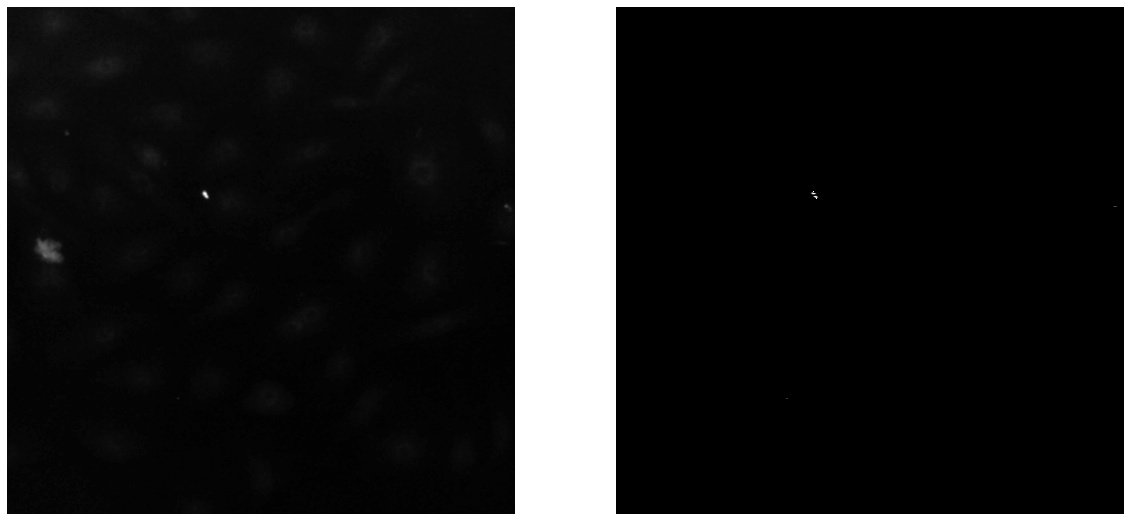

In [358]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage, misc

df = out_df
select_color = df.loc[(df['Column'] == '10') & (df['Row'] == '9') & (df['TimePoint'] == '1') & 
                         (df['FieldIndex'] == '7')& (df['Channel']=='2' )& (df['ActionIndex']=='4' )]
print(select_color)
from PIL import Image
z_imglist=[]
for index, row in select_color.iterrows():
    im = Image.open(row['ImageName'])
    z_imglist.append( np.asarray(im))
z_stack = np.stack(z_imglist, axis=2)
max_project = z_stack.max(axis=2)
#ch3_img = mpimg.imread(select_color.loc[select_color['Channel']=='1']['ImageName'].iloc[0])
height, width = np.shape(max_project)
img_uint8 = cv2.normalize(max_project, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#result_16bit = ndimage.gaussian_laplace(max_project, sigma=9)
result_log = ndimage.gaussian_laplace(img_uint8, sigma=3)
result_gaussian = ndimage.gaussian_filter(img_uint8, sigma=3)


#cv2.imwrite('graymax.jpg',img_uint8)
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(result_gaussian, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(result_log, cmap='gray')
plt.axis('off')


In [395]:
max_project.shape

(1998, 1998)

9


(-0.5, 1997.5, 1997.5, -0.5)

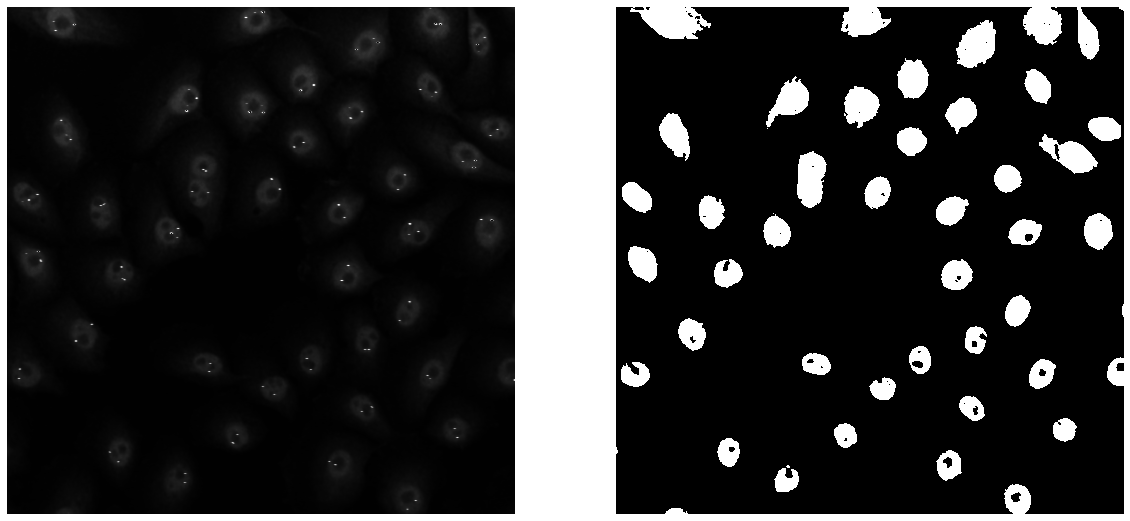

In [329]:
sum_all = result_log + result_gaussian
sum_norm = cv2.normalize(sum_all, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

ret_all, thresh_all = cv2.threshold(sum_norm,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
bin_img_all = (1-thresh_all/255).astype('bool')
print(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
filled_int_all= (bin_img_all*255).astype('uint8')

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(sum_norm, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(filled_int_all, cmap='gray')
plt.axis('off')

9
9


(-0.5, 1997.5, 1997.5, -0.5)

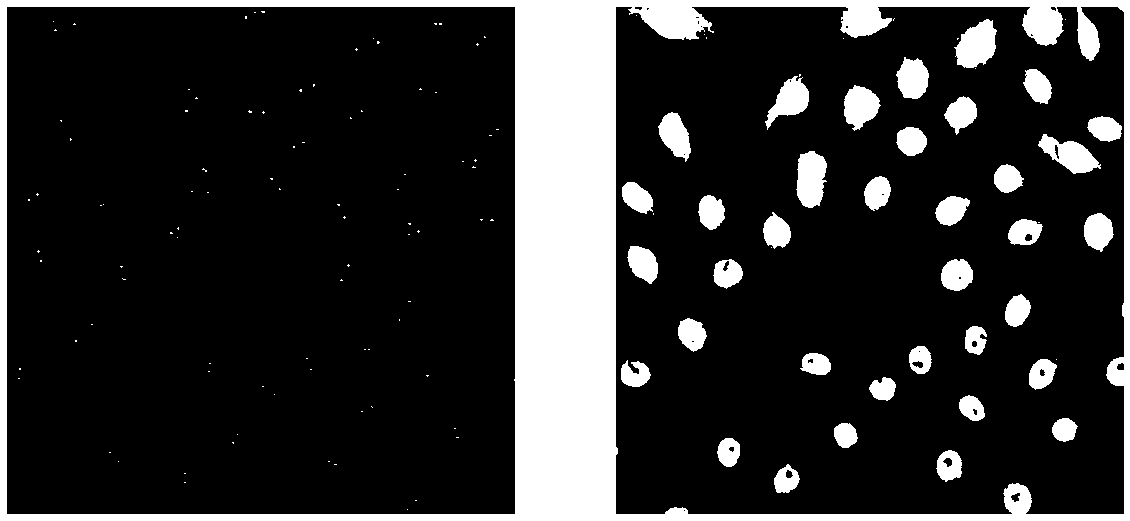

In [330]:
from scipy import ndimage

ret_log, thresh_log = cv2.threshold(result_log,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
bin_img_log = (1-thresh_log/255).astype('bool')
print(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
filled_int_log= (bin_img_log*255).astype('uint8')

ret_g, thresh_g = cv2.threshold(result_gaussian,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
bin_img_g = (1-thresh_g/255).astype('bool')
print(cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
filled_int_g= (bin_img_g*255).astype('uint8')

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(bin_img_log, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(bin_img_g, cmap='gray')
plt.axis('off')

(-0.5, 2551.5, 2151.5, -0.5)

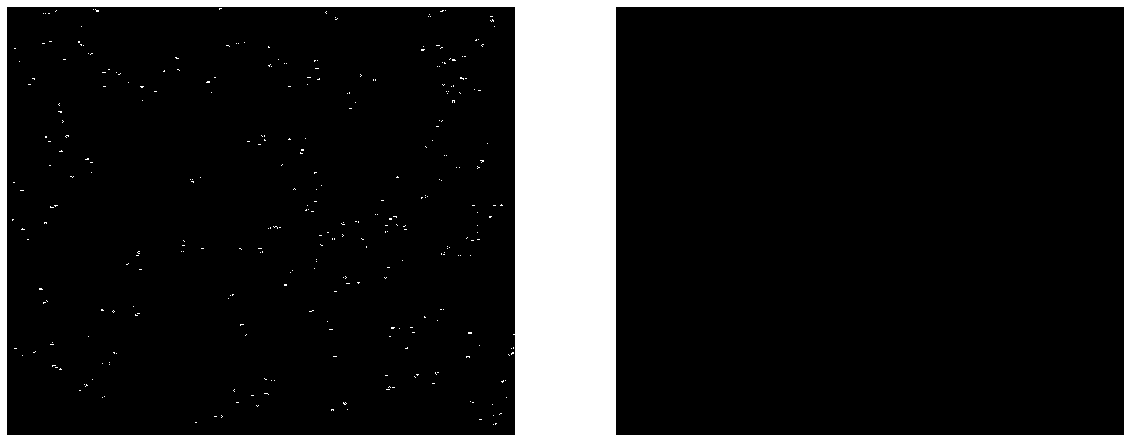

In [296]:
thresh_log = cv2.adaptiveThreshold(result_log,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
bin_img_log = (1-thresh_log/255).astype('bool')
filled_int_log= (bin_img_log*255).astype('uint8')

thresh_g = cv2.adaptiveThreshold(result_gaussian,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
bin_img_g = (1-thresh_g/255).astype('bool')
filled_int_g= (bin_img_g*255).astype('uint8')

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(filled_int_log, cmap = 'gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(filled_int_g, cmap='gray')
plt.axis('off')


(-0.5, 2551.5, 2151.5, -0.5)

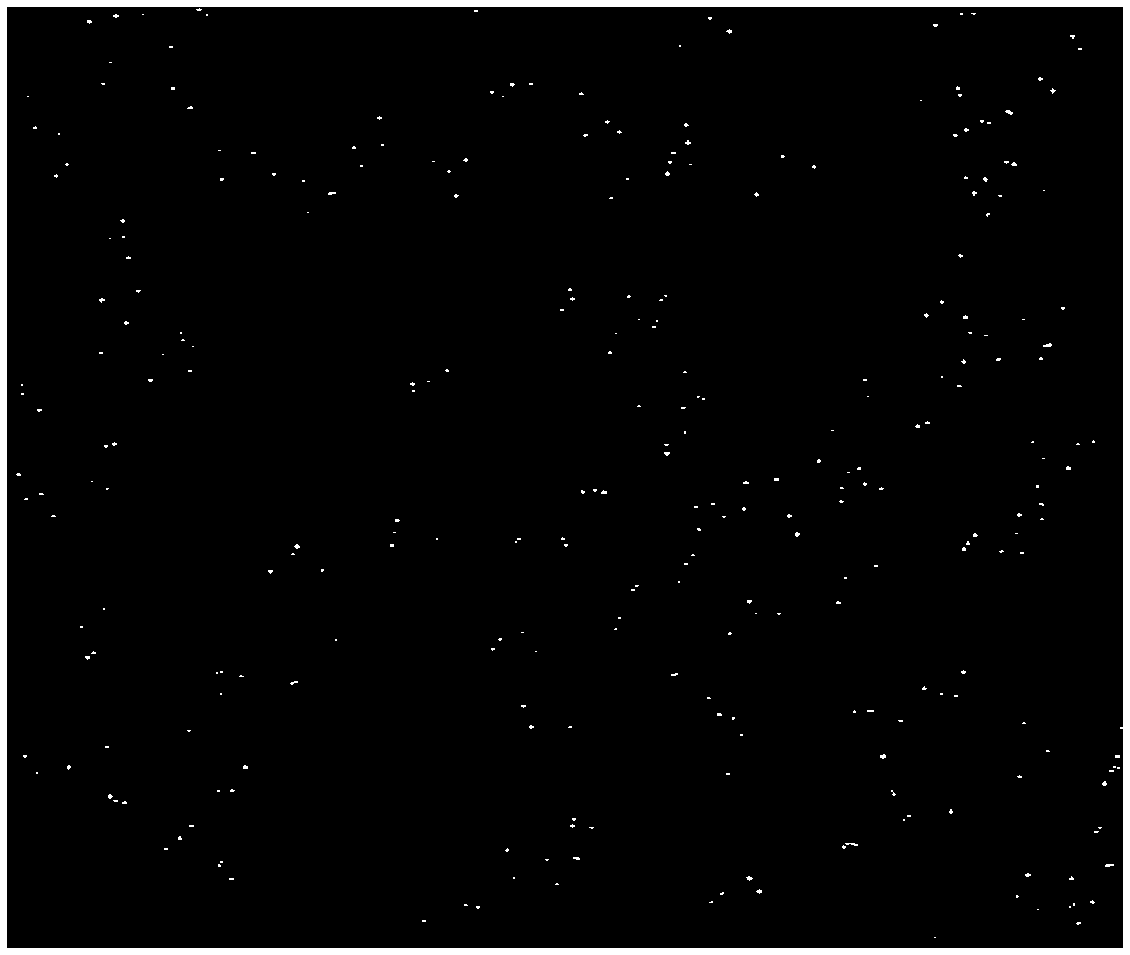

In [114]:
#closed_img = ndimage.binary_closing(~thresh2).astype(np.int)
kernel = np.ones((3,3),np.uint8)

closed_img = cv2.morphologyEx(filled_int_log, cv2.MORPH_OPEN, kernel)

blurred_spots = ndimage.gaussian_filter(closed_img, sigma=2)
ret2, thresh2 = cv2.threshold(blurred_spots,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(20, 20))
plt.imshow(closed_img, cmap='gray')
plt.axis('off')

In [367]:
a=np.zeros(z_stack.shape, dtype='uint8')
coordinates = peak_local_max(a)
spots_z_slices = np.argmax(z_stack[coordinates[:,0], coordinates[:,1],:], axis=1)
print(spots_z_slices)

[]


(61, 2) (62,)


(-0.5, 1997.5, 1997.5, -0.5)

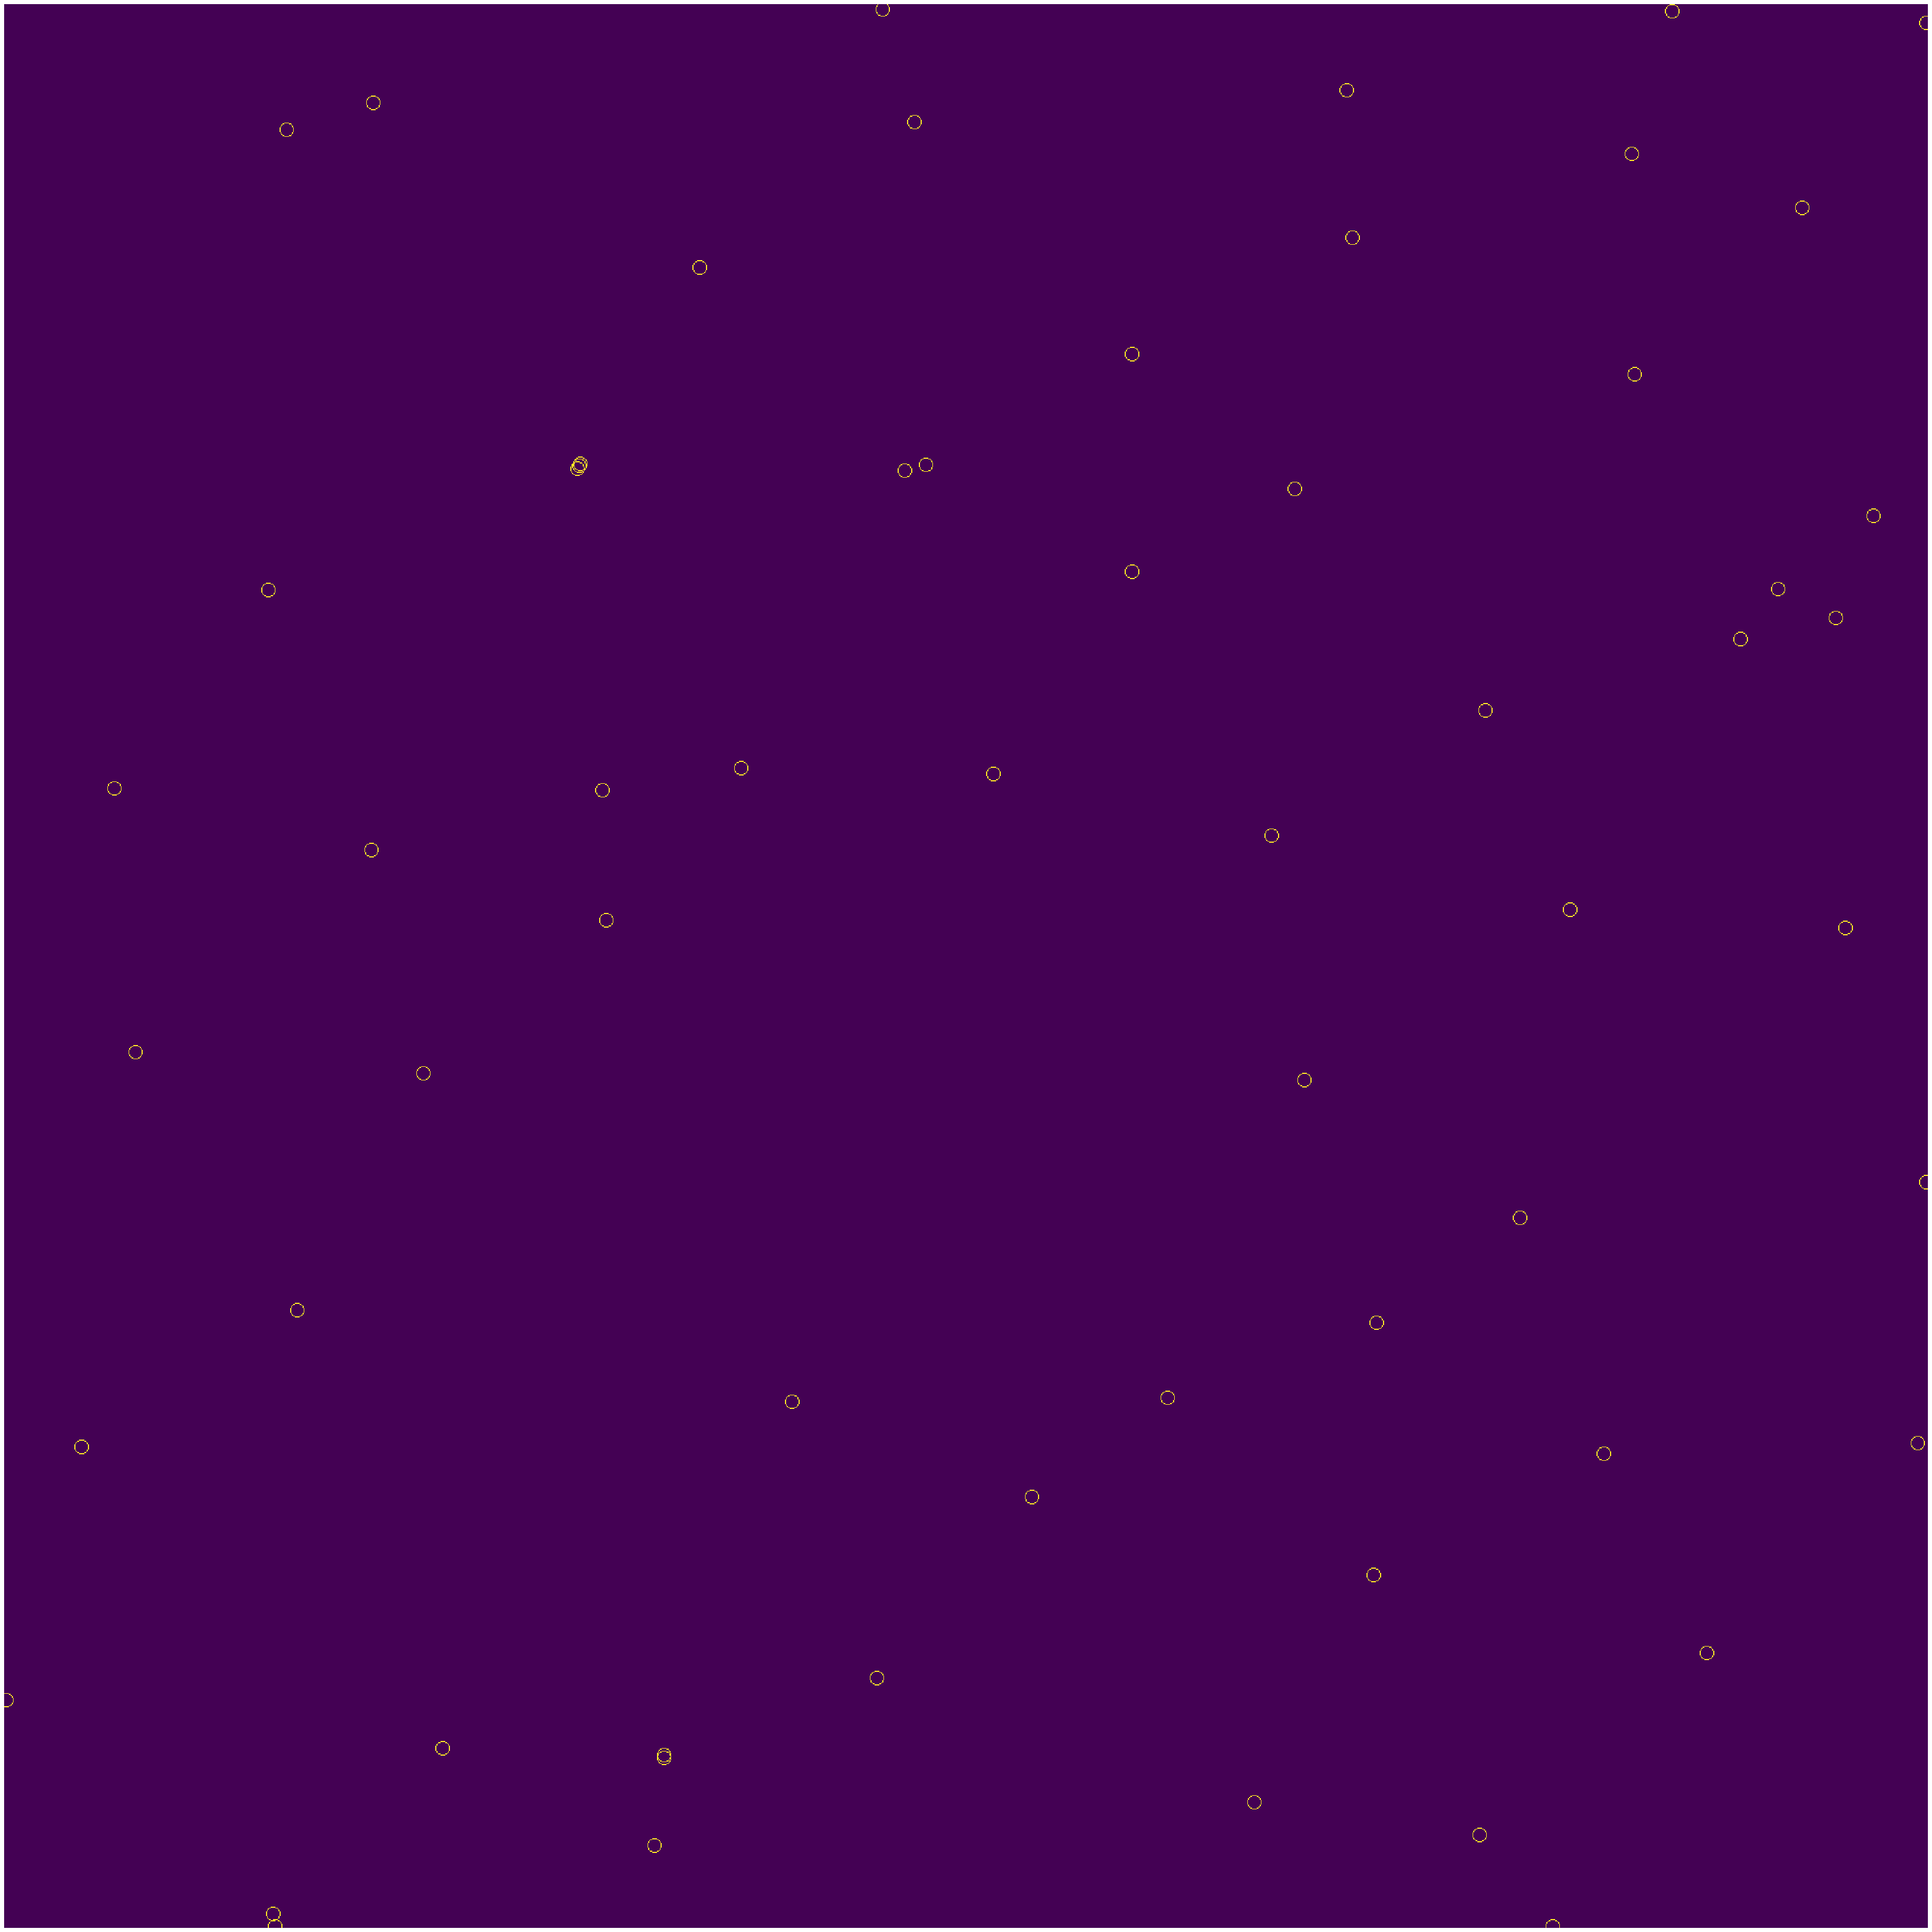

In [332]:
from scipy.ndimage import label
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter

bin_img = (1-thresh2/255).astype('bool')
filled_int= (bin_img*255).astype('uint8')
labeled_array, num_features = label(filled_int_all)
coordinates = peak_local_max(filled_int_all, labels=labeled_array, num_peaks_per_label=1, indices=True)
print(coordinates.shape, np.unique(labeled_array).shape)
image_input_stack = np.stack((sum_norm,)*3, axis=-1)
w,h = filled_int_all.shape
circles = np.zeros(filled_int_all.shape)
for center_y, center_x in zip(coordinates[:,0], coordinates[:,1]):
        circy, circx = circle_perimeter(center_y, center_x, 7, shape=filled_int_all.shape)
        circles[circy, circx] = 255

plt.figure(figsize=(60, 60))
plt.imshow(circles)
plt.axis('off')

In [267]:
import multiprocessing as mp

mp.cpu_count()


16

In [393]:
ch2_spot_df = pd.read_excel('ch2_spot_df1.xlsx')
ch3_spot_df = pd.read_excel('ch3_spot_df1.xlsx')
ch4_spot_df = pd.read_excel('ch4_spot_df1.xlsx')


In [ ]:
spot_columns = np.unique(np.asarray(Meta_Data_df['Column'], dtype=int))
spot_rows = np.unique(np.asarray(Meta_Data_df['Row'], dtype=int))
spot_fovs = np.unique(np.asarray(Meta_Data_df['FieldIndex'], dtype=int))
spot_timepoints = np.unique(np.asarray(Meta_Data_df['TimePoint'], dtype=int))
spot_actionindices = np.unique(np.asarray(Meta_Data_df['ActionIndex'], dtype=int))
spot_ZSlice = np.unique(np.asarray(Meta_Data_df['ZSlice'], dtype=int))
spot_cellindex = np.unique(np.asarray(Meta_Data_df['cell index'], dtype=int))
cell_indicators = [ "Column", "Row", "Time Point", "Field Index", "ZSlice", "Channel", "Action Index", "cell index"]
for indicator in cell_indicators:
    ch2_

In [382]:
with pd.ExcelWriter('HiC_data_all.xlsx') as writer:  
    for image in unique_images:
        for cells in unique_cells:
            for experiments in unique_experiments:

                selected_cell = tier2.loc[(tier2['image'] == image) & 
                                          (tier2['roi'] == cells) & 
                                          (tier2['category'] == experiments)]

                if selected_cell.empty == False:

                    hic_matrix = np.zeros((66,66), dtype= 'float64')
                    HiC_data = pd.DataFrame(hic_matrix, columns = loci_list, index=loci_list)

                    for locus1 in loci_list:
                        locus1_ploidy = int(locus1.split('-')[1])
                        locus1_name = locus1.split('-')[0]

                        locus1_df = selected_cell.loc[(selected_cell['ploid'] == locus1_ploidy) & 
                                                      (selected_cell['loci'] == locus1_name)]

                        if locus1_df.empty == False:

                            for locus2 in loci_list:

                                locus2_ploidy = int(locus2.split('-')[1])
                                locus2_name = locus2.split('-')[0]

                                locus2_df = selected_cell.loc[(selected_cell['ploid'] == locus2_ploidy) & 
                                                              (selected_cell['loci'] == locus2_name)]

                                if locus2_df.empty == False:

                                    distance =  math.sqrt(
                                                math.pow((locus1_df['pos_x'].iloc[0] - locus2_df['pos_x'].iloc[0]),2) +
                                                math.pow((locus1_df['pos_y'].iloc[0] - locus2_df['pos_y'].iloc[0]),2) +
                                                math.pow((locus1_df['pos_z'].iloc[0] - locus2_df['pos_z'].iloc[0]),2)
                                                )


                                    HiC_data.at[locus1,locus2] = distance


                    cell_sheet_name = experiments + '_image_' + str(image) + '_roi_' + str(cells)
                    HiC_data.to_excel(writer, sheet_name = cell_sheet_name)
                    sheet_names.append(cell_sheet_name)
                    sheet_nm = pd.DataFrame(sheet_names, columns = ['sheet_names'])
                    sheet_nm.to_excel("sheet_names.xlsx")


In [386]:
with pd.ExcelWriter(os.path.join(path1,'output.xlsx'), engine="openpyxl", mode='a') as writer: 
    out_df.to_excel(writer, sheet_name='out_df')

In [371]:
from math import sqrt
from joblib import Parallel, delayed
Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [405]:
labeled_nuc, number_nuc = label(filled_int_all)
a=np.unique((labeled_nuc))
a[a>0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int32)